# Root Mean Squared Error (RMSE)

In [1]:
from scores.continuous import mae
from scores.continuous import mse
from scores.continuous import rmse

help(rmse)

Help on function rmse in module scores.continuous:

rmse(fcst, obs, reduce_dims=None, preserve_dims=None, weights=None)
    Root Mean Squared Error
    
    Args:
      - fcst: Forecast or predicted variables in xarray or pandas
      - obs: Observed variables in xarray or pandas
      - reduce_dims: Optionally specify which dimensions to reduce when calculating RMSE.
                     All other dimensions will be preserved.
      - preserve_dims: Optionally specify which dimensions to preserve when calculating RMSE. All other
                       dimensions will be reduced. As a special case, 'all' will allow all dimensions to
                       be preserved. In this case, the result will be in the same shape/dimensionality as
                       the forecast, and the errors will be the absolute error at each point (i.e. single-value
                       comparison against observed), and the forecast and observed dimensions must match
                       precisely.
  

In [3]:
import numpy
import pandas
import xarray

In [4]:
forecast = xarray.open_dataset('forecast_grid.nc')
analysis = xarray.open_dataset('analysis_grid.nc')

# Use RMSE to Focus on Anomalies and understandably

While using Mean Squared Error really focuses the attention on the most significant errors. the result ceases to be a 'representative' error, and is no longer as easily interpretable in terms of its units. To make this clearer, both MAE and RMSE provide a 'reasonable description' of the error you can expect to experience. Here RMSE can show the error with favour given to extreme differences, yet can be easily understood as it maintains the data space.

Here we can see both MAE and RMSE plotted adjacent to one another to see the impacts. While quite similar, some regions have particuarly been highlighted to indicate worse performance in the anomalies.


In [5]:
# Figure One - Calculation
mean = mae(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 
squared = mse(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 
root = rmse(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time') 

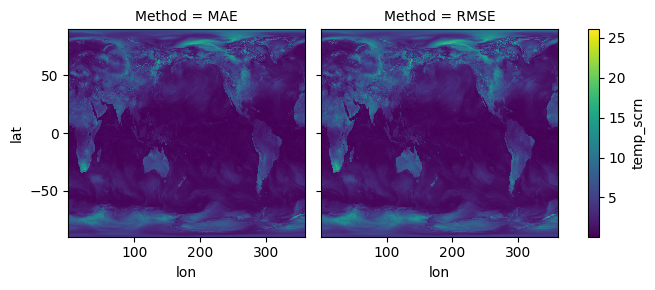

In [6]:
# Figure One - Side by Side Comparison of MAE and RMSE
names = pandas.Index(['MAE', 'RMSE'], name="Method")
xarray.concat([mean, root], dim=names).plot(col='Method')

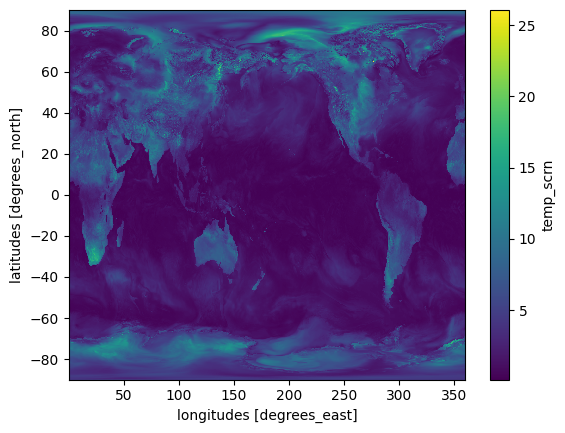

In [7]:
# Figure Two - Root Mean Absolute Error of Predictions
rmse(forecast.temp_scrn,forecast.temp_scrn[0], reduce_dims='time').plot()

# Matching the Forecast Lead Time and to Observations

The details of matching the forecast time step to the observation time step are the same as the tutorial on Mean Absolute Error - please review that notebook for a more detailed overview.

In [8]:
time_step_of_interest = forecast.temp_scrn[24*4-1]

In [9]:
rmse(time_step_of_interest, analysis.temp_scrn).values

array(2.4708517, dtype=float32)

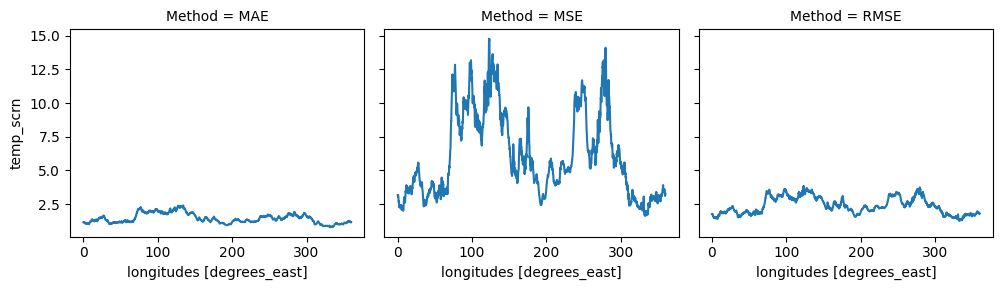

In [10]:
mae_by_longitude = mae(time_step_of_interest, analysis.temp_scrn, reduce_dims='lat')
mse_by_longitude = mse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lat')
rmse_by_longitude = rmse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lat')
names = pandas.Index(['MAE', 'MSE', 'RMSE'], name="Method")
xarray.concat([mae_by_longitude, mse_by_longitude, rmse_by_longitude], dim=names).plot(col='Method')

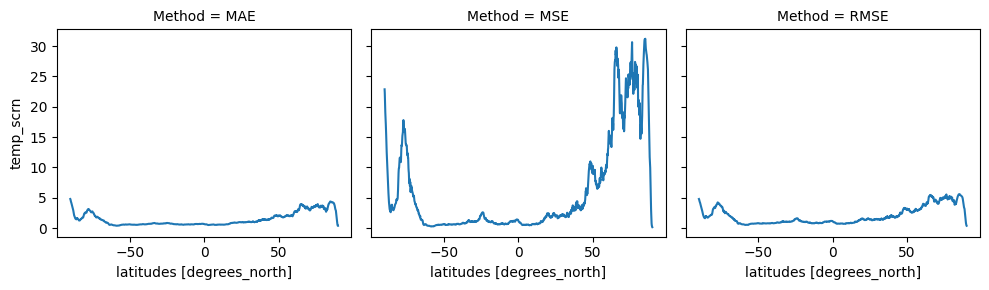

In [11]:
mae_by_latitude = mae(time_step_of_interest, analysis.temp_scrn, reduce_dims='lon')
mse_by_latitude = mse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lon')
rmse_by_latitude = rmse(time_step_of_interest, analysis.temp_scrn, reduce_dims='lon')
xarray.concat([mae_by_latitude, mse_by_latitude, rmse_by_latitude], dim=names).plot(col='Method')